In [1]:
import yfinance as yf
import talib
import numpy as np
import pandas as pd


In [2]:
# ============================================================================
# DOWNLOAD STOCK DATA FROM 2018 USING YFINANCE
# ============================================================================

# Configuration - Change these variables as needed
TICKER = 'QQQ' # Any ticker symbol (e.g., 'AAPL', 'MSFT', 'GOOGL')
START_DATE = '2018-01-01' # Any start date in YYYY-MM-DD format

# Download data from start date onwards
stock_data = yf.download(TICKER, start=START_DATE, interval='1d')

if not stock_data.empty:
    print(f" Successfully downloaded {len(stock_data)} records for {TICKER} from {START_DATE}")
    print(f"Data range: {stock_data.index.min().date()} to {stock_data.index.max().date()}")
    print("\nFirst 5 rows:")
    print(stock_data.head())
else:
    print(f" Failed to download {TICKER} data from yfinance")

# Display the downloaded data
stock_data


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_37729/4113582125.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(TICKER, start=START_DATE, interval='1d')
[*********************100%***********************]  1 of 1 completed

 Successfully downloaded 1946 records for QQQ from 2018-01-01
Data range: 2018-01-02 to 2025-09-29

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker             QQQ         QQQ         QQQ         QQQ       QQQ
Date                                                                
2018-01-02  150.605362  150.643366  148.400772  148.771369  32573300
2018-01-03  152.068710  152.201745  150.719355  150.747862  29383600
2018-01-04  152.334808  152.790925  152.116255  152.591380  24776100
2018-01-05  153.864746  153.969274  152.771962  153.057041  26992300
2018-01-08  154.463379  154.539401  153.807703  153.864716  23159100


Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2018-01-02,150.605362,150.643366,148.400772,148.771369,32573300
2018-01-03,152.068710,152.201745,150.719355,150.747862,29383600
2018-01-04,152.334808,152.790925,152.116255,152.591380,24776100
2018-01-05,153.864746,153.969274,152.771962,153.057041,26992300
2018-01-08,154.463379,154.539401,153.807703,153.864716,23159100
...,...,...,...,...,...
2025-09-23,598.200012,602.570007,596.979980,602.369995,64635500
2025-09-24,596.099976,599.900024,593.359985,599.580017,49850300


In [3]:
# ============================================================================
# TECHNICAL ANALYSIS INDICATORS USING TA-LIB
# ============================================================================

# Make sure stock_data is available from the previous cell
if "stock_data" not in locals():
    raise ValueError("Please run the stock data download cell first")

    # Extract OHLCV data (handling multi-level columns from yfinance)
    if isinstance(stock_data.columns, pd.MultiIndex):
        close = stock_data[("Close", TICKER)].values
        high = stock_data[("High", TICKER)].values
        low = stock_data[("Low", TICKER)].values
        open_ = stock_data[("Open", TICKER)].values
        volume = stock_data[("Volume", TICKER)].values
    else:
    close = stock_data["Close"].values
    high = stock_data["High"].values
    low = stock_data["Low"].values
    open_ = stock_data["Open"].values
    volume = stock_data["Volume"].values

    print(f"Calculating technical indicators for {TICKER}...")

    # Simple Moving Averages
    sma_20 = talib.SMA(close, timeperiod=20)
    sma_50 = talib.SMA(close, timeperiod=50)

    # Exponential Moving Averages
    ema_12 = talib.EMA(close, timeperiod=12)
    ema_26 = talib.EMA(close, timeperiod=26)

    # MACD
    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

    # RSI
    rsi = talib.RSI(close, timeperiod=14)

    # Stochastic RSI
    stochrsi_k, stochrsi_d = talib.STOCHRSI(close, timeperiod=14, fastk_period=3, fastd_period=3, fastd_matype=0)

    # VWAP (manual calculation)
    typical_price = (high + low + close) / 3
    price_volume = typical_price * volume
    cumulative_price_volume = np.cumsum(price_volume)
    cumulative_volume = np.cumsum(volume)
    vwap = cumulative_price_volume / cumulative_volume

    # Schaff Trend Cycle
    cycle_period = 10
    macd_cycle = talib.EMA(macd, timeperiod=cycle_period)
    macd_smooth = talib.EMA(macd_cycle, timeperiod=cycle_period)
    highest_macd = talib.MAX(macd_smooth, timeperiod=cycle_period)
    lowest_macd = talib.MIN(macd_smooth, timeperiod=cycle_period)
    stc_k = 100 * ((macd_smooth - lowest_macd) / (highest_macd - lowest_macd))
    stc_d = talib.SMA(stc_k, timeperiod=3)

    # Create indicators dataframe
    indicators_df = pd.DataFrame({
    "Date": stock_data.index,
    "Close": close,
    "SMA_20": sma_20,
    "SMA_50": sma_50,
    "EMA_12": ema_12,
    "EMA_26": ema_26,
    "MACD": macd,
    "MACD_Signal": macdsignal,
    "MACD_Hist": macdhist,
    "RSI": rsi,
    "StochRSI_K": stochrsi_k,
    "StochRSI_D": stochrsi_d,
    "VWAP": vwap,
    "STC_K": stc_k,
    "STC_D": stc_d
    })

    print(" All technical indicators calculated")
    print(f"Data shape: {indicators_df.shape}")
    indicators_df.tail(5)


IndentationError: expected an indented block after 'else' statement on line 16 (3957169176.py, line 17)

In [ ]:
# STEP 1: PREPARE PRICE SERIES

import pandas as pd
import numpy as np
import vectorbt as vbt
import warnings

warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Expect stock_data and TICKER already exist
def select_close_series(df, ticker):
    if isinstance(df.columns, pd.MultiIndex):
        if ('Close', ticker) in df.columns:
            s = df[('Close', ticker)]
        else:
        cols = [c for c in df.columns if 'Close' in str(c)]
        if not cols:
            raise KeyError("Close not found")
            s = df[cols[0]] 
        else:
        s = df['Close']
        return s.astype(float).squeeze()

        close = select_close_series(stock_data, TICKER)
        close.name = 'price'

        # Simple split
        TRAIN_RATIO = 0.7
        split_idx = int(len(close) * TRAIN_RATIO)
        train_close = close.iloc[:split_idx].copy()
        val_close = close.iloc[split_idx:].copy()

        print(f"Data ready: train={train_close.index[0].date()} → {train_close.index[-1].date()} | val={val_close.index[0].date()} → {val_close.index[-1].date()}")


IndentationError: expected an indented block after 'else' statement on line 16 (605209885.py, line 17)

# TRIPLE EMA CROSSOVER GRID SEARCH - TRAINING SET 
 
This section performs a comprehensive grid search optimization for the **Triple EMA Crossover Strategy** using only the **training data**. 
 
The goal is to find the optimal EMA1/EMA2/EMA3 combination that maximizes the Sharpe ratio on unseen data. 
 
**Strategy Logic**: Buy when any EMA crosses above another (EMA1 > EMA2, EMA1 > EMA3, or EMA2 > EMA3). Sell when any EMA crosses below another. 
 
---

In [ ]:
# Step 1: Define Parameter Ranges for Triple EMA Crossover

# EMA periods for triple crossover strategy
ema1_periods = [5, 8, 10, 12, 15] # Fast EMA (shortest-term)
ema2_periods = [20, 25, 30, 35, 40] # Medium EMA (medium-term)
ema3_periods = [50, 60, 70, 80, 100] # Slow EMA (longest-term)

print(" EMA1 Periods (fast - shortest-term):")
for i, period in enumerate(ema1_periods, 1):
    print(f" {i}. {period} periods")

    print(" EMA2 Periods (medium - medium-term):")
    for i, period in enumerate(ema2_periods, 1):
        print(f" {i}. {period} periods")

        print(" EMA3 Periods (slow - longest-term):")
        for i, period in enumerate(ema3_periods, 1):
            print(f" {i}. {period} periods")

            # Generate all valid combinations (ema1 < ema2 < ema3)
            ema_combinations = []
            for ema1 in ema1_periods:
                for ema2 in ema2_periods:
                    for ema3 in ema3_periods:
                        if ema1 < ema2 < ema3:
                            ema_combinations.append((ema1, ema2, ema3))

                            print(f" Generated {len(ema_combinations)} valid Triple EMA combinations")
                            print("\n First 10 combinations preview:")
                            for i, (ema1, ema2, ema3) in enumerate(ema_combinations[:10], 1):
                                print(f" {i:2d}. EMA1: {ema1:2d} | EMA2: {ema2:2d} | EMA3: {ema3:2d}")
                                if len(ema_combinations) > 10:
                                    print(f" ... and {len(ema_combinations) - 10} more combinations")

                                    print("\n Starting test all Triple EMA combinations on training data")


IndentationError: expected an indented block after 'for' statement on line 23 (4188827356.py, line 24)

In [ ]:
# FIXED: Triple EMA Combinations (replaces old double SMA logic)

# EMA periods for triple crossover strategy
ema1_periods = [5, 8, 10, 12, 15] # Fast EMA (shortest-term)
ema2_periods = [20, 25, 30, 35, 40] # Medium EMA (medium-term)
ema3_periods = [50, 60, 70, 80, 100] # Slow EMA (longest-term)

# Generate all valid combinations (ema1 < ema2 < ema3)
ema_combinations = []
for ema1 in ema1_periods:
    for ema2 in ema2_periods:
        for ema3 in ema3_periods:
            if ema1 < ema2 < ema3:
                ema_combinations.append((ema1, ema2, ema3))

                print(f"📦 Fixed: Generated {len(ema_combinations)} Triple EMA combinations")
                print("First 3 combinations:")
                for i, (ema1, ema2, ema3) in enumerate(ema_combinations[:3], 1):
                    print(f" {i}. EMA({ema1}, {ema2}, {ema3})")


📦 Fixed: Generated 125 Triple EMA combinations
First 3 combinations:
  1. EMA(5, 20, 50)
  2. EMA(5, 20, 60)
  3. EMA(5, 20, 70)


In [ ]:
# Step 2: Initialize Triple EMA Results Collection System

# Create empty list to store all backtest results
grid_search_results = []

print(" Triple EMA Results Collection System Initialized")
print(f" - Will test {len(ema_combinations)} Triple EMA combinations")
print(" - Results will be stored in 'grid_search_results' list")

# Define what metrics we will collect (All TradingView-style metrics)
metrics_to_collect = [
# Strategy Parameters
"ema1_period",
"ema2_period",
"ema3_period",

# Return Metrics
"total_return",
"annualized_return",
"total_profit",

# Risk-Adjusted Return Metrics
"sharpe_ratio",
"sortino_ratio",
"calmar_ratio",
"omega_ratio",
"information_ratio",
"tail_ratio",
"deflated_sharpe_ratio",

# Risk Metrics
"max_drawdown",
"volatility",
"ulcer_index",

# Trade Performance Metrics
"win_rate",
"total_trades",
"avg_trade_duration",
"expectancy",
"profit_factor",
"sqn",

# Win/Loss Analysis
"payoff_ratio",
"largest_win",
"largest_loss",
"avg_win_amount",
"avg_loss_amount",
"winning_streak",
"losing_streak",

# Additional Ratios
"recovery_factor",
"gain_to_pain_ratio",
"serenity_index"
]

print(" Metrics to collect for each Triple EMA combination:")
for i, metric in enumerate(metrics_to_collect, 1):
    print(f" {i}. {metric.replace('_', ' ').title()}")

print("\\n Starting start the Triple EMA grid search")


📊 Triple EMA Results Collection System Initialized
   - Will test 125 Triple EMA combinations
   - Results will be stored in 'grid_search_results' list
📈 Metrics to collect for each Triple EMA combination:
  1. Ema1 Period
  2. Ema2 Period
  3. Ema3 Period
  4. Total Return
  5. Annualized Return
  6. Total Profit
  7. Sharpe Ratio
  8. Sortino Ratio
  9. Calmar Ratio
  10. Omega Ratio
  11. Information Ratio
  12. Tail Ratio
  13. Deflated Sharpe Ratio
  14. Max Drawdown
  15. Volatility
  16. Ulcer Index
  17. Win Rate
  18. Total Trades
  19. Avg Trade Duration
  20. Expectancy
  21. Profit Factor
  22. Sqn
  23. Payoff Ratio
  24. Largest Win
  25. Largest Loss
  26. Avg Win Amount
  27. Avg Loss Amount
  28. Winning Streak
  29. Losing Streak
  30. Recovery Factor
  31. Gain To Pain Ratio
  32. Serenity Index
\n🚀 Ready to start the Triple EMA grid search!


In [ ]:
# STEP 3: VISUALIZE SIGNALS FOR ONE EXAMPLE

example_ema1, example_ema2, example_ema3 = 5, 20, 50
ema1_ma = vbt.MA.run(train_close, example_ema1, ewm=True).ma
ema2_ma = vbt.MA.run(train_close, example_ema2, ewm=True).ma
ema3_ma = vbt.MA.run(train_close, example_ema3, ewm=True).ma

# Triple EMA crossover signals
entries_1 = ema1_ma.vbt.crossed_above(ema2_ma).reindex(train_close.index).fillna(False)
entries_2 = ema1_ma.vbt.crossed_above(ema3_ma).reindex(train_close.index).fillna(False)
entries_3 = ema2_ma.vbt.crossed_above(ema3_ma).reindex(train_close.index).fillna(False)
entries = entries_1 | entries_2 | entries_3

exits_1 = ema1_ma.vbt.crossed_below(ema2_ma).reindex(train_close.index).fillna(False)
exits_2 = ema1_ma.vbt.crossed_below(ema3_ma).reindex(train_close.index).fillna(False)
exits_3 = ema2_ma.vbt.crossed_below(ema3_ma).reindex(train_close.index).fillna(False)
exits = exits_1 | exits_2 | exits_3

signals_df = pd.DataFrame({
'Close': train_close.values,
'EMA1': ema1_ma.values,
'EMA2': ema2_ma.values,
'EMA3': ema3_ma.values,
'Buy': entries.values.astype(bool),
'Sell': exits.values.astype(bool)
}, index=train_close.index)
signals_df.index.name = 'Date'

pos = 0
pos_list = []
for buy, sell in zip(signals_df['Buy'], signals_df['Sell']):
    if buy: pos = 1
elif sell: pos = 0
pos_list.append(pos)
signals_df['Position'] = pos_list

print(f" Example EMA({example_ema1},{example_ema2},{example_ema3}) signals:")
print(signals_df.head(20).to_string())


📈 Example EMA(5,20,50) signals:
                 Close        EMA1        EMA2  EMA3    Buy   Sell  Position
Date                                                                        
2018-01-02  150.605362         NaN         NaN   NaN  False  False         0
2018-01-03  152.068726         NaN         NaN   NaN  False  False         0
2018-01-04  152.334824         NaN         NaN   NaN  False  False         0
2018-01-05  153.864716         NaN         NaN   NaN  False  False         0
2018-01-08  154.463303  153.016389         NaN   NaN  False  False         0
2018-01-09  154.472839  153.501873         NaN   NaN  False  False         0
2018-01-10  154.111755  153.705167         NaN   NaN  False  False         0
2018-01-11  155.166580  154.192305         NaN   NaN  False  False         0
2018-01-12  156.306870  154.897160         NaN   NaN  False  False         0
2018-01-16  155.860275  155.218198         NaN   NaN  False  False         0
2018-01-17  157.542145  155.992847         N

In [ ]:
# add more indicators and entries, fix it in 1 notebook, i think its easier to then just copy paste after


In [ ]:
# STEP 3: EXECUTE Complete TRIPLE EMA CROSSOVER GRID SEARCH ON TRAINING DATA

import vectorbt as vbt

print(" Starting TRIPLE EMA CROSSOVER GRID SEARCH optimization")
print("=" * 70)
print(f" Testing Strategy: Triple Exponential Moving Average Crossover")
print(f" Training Period: {train_close.index[0].date()} → {train_close.index[-1].date()}")
print(f" Initial Capital: $100,000")
print(f" Transaction Costs: 0.05% per trade (fees + slippage)")
print(f" Optimization Metric: Sharpe Ratio (risk-adjusted returns)")
print("=" * 70)

# Initialize grid search tracking
total_combinations = len(ema_combinations)
completed_tests = 0
successful_tests = 0
failed_tests = 0

print(f" Starting grid search across {total_combinations} parameter combinations...")
print()

# MAIN GRID SEARCH LOOP
for i, (ema1_period, ema2_period, ema3_period) in enumerate(ema_combinations, 1):

    try:
    # ==========================================
    # INDICATOR CALCULATION
    # ==========================================

    # Calculate Exponential Moving Averages on training data
    ema1 = vbt.MA.run(train_close, ema1_period, ewm=True) # Fast EMA
    ema2 = vbt.MA.run(train_close, ema2_period, ewm=True) # Medium EMA
    ema3 = vbt.MA.run(train_close, ema3_period, ewm=True) # Slow EMA

    # ==========================================
    # SIGNAL GENERATION (Triple EMA Crossover)
    # ==========================================

    # BUY SIGNAL: Any EMA crossover (ta.crossover(EMA1, EMA2) or ta.crossover(EMA1, EMA3) or ta.crossover(EMA2, EMA3))
    entries = (ema1.ma_crossed_above(ema2.ma) |
    ema1.ma_crossed_above(ema3.ma) |
    ema2.ma_crossed_above(ema3.ma))

    # SELL SIGNAL: Any EMA crosses below another (opposite of buy signal)
    exits = (ema1.ma_crossed_below(ema2.ma) |
    ema1.ma_crossed_below(ema3.ma) |
    ema2.ma_crossed_below(ema3.ma))

    # ==========================================
    # BACKTEST EXECUTION
    # ==========================================

    # Run portfolio simulation with realistic trading costs
    portfolio = vbt.Portfolio.from_signals(
    close=train_close, # Price data
    entries=entries, # Buy signals
    exits=exits, # Sell signals
    init_cash=100_000, # Starting capital
    fees=0.0005, # 5 basis points commission
    slippage=0.0005, # 5 basis points slippage
    freq='D' # Daily frequency for calculations
    )

    # ==========================================
    # PERFORMANCE METRICS CALCULATION
    # ==========================================

    # Return Metrics
    total_return = portfolio.total_return()
    annualized_return = portfolio.annualized_return(freq='D')
    total_profit = portfolio.total_profit()

    # Risk-Adjusted Return Metrics (TradingView style)
    sharpe_ratio = portfolio.sharpe_ratio(freq='D')
    sortino_ratio = portfolio.sortino_ratio(freq='D')
    calmar_ratio = portfolio.calmar_ratio(freq='D')
    omega_ratio = portfolio.omega_ratio(freq='D')
    information_ratio = portfolio.information_ratio(freq='D')
    tail_ratio = portfolio.tail_ratio(freq='D')
    deflated_sharpe_ratio = portfolio.deflated_sharpe_ratio(freq='D')

    # Risk Metrics
    max_drawdown = portfolio.max_drawdown()
    volatility = portfolio.annualized_volatility(freq='D')

    # Calculate Ulcer Index (custom calculation)
    returns = portfolio.returns()
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding().max()
    drawdowns = (cumulative_returns - peak) / peak
    ulcer_index = np.sqrt((drawdowns ** 2).mean()) if len(drawdowns) > 0 else 0

    # Trade Performance Metrics
    win_rate = portfolio.trades.win_rate()
    total_trades = len(portfolio.trades)
    avg_trade_duration = portfolio.trades.duration.mean()
    expectancy = portfolio.trades.expectancy()
    profit_factor = portfolio.trades.profit_factor()
    sqn = portfolio.trades.sqn()

    # Win/Loss Analysis
    trade_returns = portfolio.trades.returns
    winning_trades = trade_returns[trade_returns > 0]
    losing_trades = trade_returns[trade_returns < 0]

    # Payoff Ratio (Average Win / Average Loss)
    avg_win_amount = winning_trades.mean() if len(winning_trades) > 0 else 0
    avg_loss_amount = abs(losing_trades.mean()) if len(losing_trades) > 0 else 0
    payoff_ratio = avg_win_amount / avg_loss_amount if avg_loss_amount = 0 else np.inf

    # Largest Win/Loss
    largest_win = winning_trades.max() if len(winning_trades) > 0 else 0
    largest_loss = losing_trades.min() if len(losing_trades) > 0 else 0

    # Streak Analysis
    winning_streak = portfolio.trades.winning_streak()
    losing_streak = portfolio.trades.losing_streak()

    # Additional Ratios
    recovery_factor = total_return / abs(max_drawdown) if max_drawdown = 0 else np.inf

    # Gain to Pain Ratio (Total Return / Sum of Negative Returns)
    negative_returns = returns[returns < 0]
    gain_to_pain_ratio = total_return / abs(negative_returns.sum()) if negative_returns.sum() = 0 else np.inf

    # Serenity Index (TradingView style: (Total Return + 1) / (Max Drawdown^2 + 1))
    serenity_index = (total_return + 1) / (max_drawdown**2 + 1) if max_drawdown = 0 else total_return + 1

    # ==========================================
    # RESULTS STORAGE
    # ==========================================

    result = {
    # Strategy Parameters
    "ema1_period": ema1_period,
    "ema2_period": ema2_period,
    "ema3_period": ema3_period,

    # Return Metrics
    "total_return": total_return,
    "annualized_return": annualized_return,
    "total_profit": total_profit,

    # Risk-Adjusted Return Metrics
    "sharpe_ratio": sharpe_ratio,
    "sortino_ratio": sortino_ratio,
    "calmar_ratio": calmar_ratio,
    "omega_ratio": omega_ratio,
    "information_ratio": information_ratio,
    "tail_ratio": tail_ratio,
    "deflated_sharpe_ratio": deflated_sharpe_ratio,

    # Risk Metrics
    "max_drawdown": max_drawdown,
    "volatility": volatility,
    "ulcer_index": ulcer_index,

    # Trade Performance Metrics
    "win_rate": win_rate,
    "total_trades": total_trades,
    "avg_trade_duration": avg_trade_duration,
    "expectancy": expectancy,
    "profit_factor": profit_factor,
    "sqn": sqn,

    # Win/Loss Analysis
    "payoff_ratio": payoff_ratio,
    "largest_win": largest_win,
    "largest_loss": largest_loss,
    "avg_win_amount": avg_win_amount,
    "avg_loss_amount": avg_loss_amount,
    "winning_streak": winning_streak,
    "losing_streak": losing_streak,

    # Additional Ratios
    "recovery_factor": recovery_factor,
    "gain_to_pain_ratio": gain_to_pain_ratio,
    "serenity_index": serenity_index
    }

    grid_search_results.append(result)
    successful_tests += 1

    # ==========================================
    # PROGRESS REPORTING
    # ==========================================

    # Show progress every 10 combinations or on last one
    if i % 10 == 0 or i == total_combinations:
        progress_pct = (i / total_combinations) * 100
        print(f" Progress: {i}/{total_combinations} combinations tested ({progress_pct:.1f}%)")
        print(f" Successful: {successful_tests} | Failed: {failed_tests}")
        print(f" Latest: EMA({ema1_period},{ema2_period},{ema3_period}) → Sharpe: {sharpe_ratio:.3f}, Return: {total_return:.1%}")
        print(f" Trades: {total_trades}, Win Rate: {win_rate:.1%}, Max DD: {max_drawdown:.1%}")
        print()

    except Exception as e:
        failed_tests += 1
        if i % 10 == 0 or i == total_combinations:
            print(f" Error with EMA({ema1_period},{ema2_period},{ema3_period}): {str(e)[:50]}...")
            continue

            # ==========================================
            # GRID SEARCH COMPLETION SUMMARY
            # ==========================================

            print("=" * 70)
            print(" TRIPLE EMA CROSSOVER GRID SEARCH completed")
            print("=" * 70)
            print(f" Total combinations attempted: {total_combinations}")
            print(f" Successfully completed: {successful_tests}")
            print(f" Failed: {failed_tests}")
            print(f" Success rate: {(successful_tests/total_combinations)*100:.1f}%")
            print()
            print(" Results Summary:")
            print(f" - Results stored in 'grid_search_results' list")
            print(f" - Each result contains comprehensive performance metrics")
            print(f" - Data ready for analysis in next step")
            print("=" * 70)


🔬 INITIATING TRIPLE EMA CROSSOVER GRID SEARCH OPTIMIZATION
📊 Testing Strategy: Triple Exponential Moving Average Crossover
📅 Training Period: 2018-01-02 → 2023-05-31
💰 Initial Capital: $100,000
💸 Transaction Costs: 0.05% per trade (fees + slippage)
🎯 Optimization Metric: Sharpe Ratio (risk-adjusted returns)
🚀 Starting grid search across 125 parameter combinations...

⚠️  Error with EMA(5,25,100): Columns only: This object already contains one col...
⚠️  Error with EMA(5,35,100): Columns only: This object already contains one col...
⚠️  Error with EMA(8,20,100): Columns only: This object already contains one col...
⚠️  Error with EMA(8,30,100): Columns only: This object already contains one col...
⚠️  Error with EMA(8,40,100): Columns only: This object already contains one col...
⚠️  Error with EMA(10,25,100): Columns only: This object already contains one col...
⚠️  Error with EMA(10,35,100): Columns only: This object already contains one col...
⚠️  Error with EMA(12,20,100): Columns o

In [ ]:
# STEP 4: GRID SEARCH WITH SIMPLE METRICS (FIXED TRADE CALCULATIONS)

import numpy as np
import pandas as pd
import vectorbt as vbt
import warnings

FREQ = "1D"
warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def series_to_np_bool(s: pd.Series, index: pd.Index) -> np.ndarray:
    return s.reindex(index).fillna(False).astype(bool).to_numpy(dtype=bool)

    def safe_float(x, default=np.nan):
        try:
        return float(x) if x is not None and not pd.isna(x) else default
    except Exception:
        return default

        def compute_trades_per_year(index: pd.Index, total_trades: int) -> float:
            if total_trades == 0 or len(index) == 0:
                return 0.0
                years = (index[-1] - index[0]).days / 365.25
                return float(total_trades / years) if years > 0 else np.nan

                price_np = train_close.to_numpy(dtype=float)
                results = []

                for ema1, ema2, ema3 in ema_combinations:
                    ema1_ma = vbt.MA.run(train_close, ema1, ewm=True).ma
                    ema2_ma = vbt.MA.run(train_close, ema2, ewm=True).ma
                    ema3_ma = vbt.MA.run(train_close, ema3, ewm=True).ma

                    # Triple EMA crossover logic: any EMA crosses above another
                    entries_1 = series_to_np_bool(ema1_ma.vbt.crossed_above(ema2_ma), train_close.index)
                    entries_2 = series_to_np_bool(ema1_ma.vbt.crossed_above(ema3_ma), train_close.index)
                    entries_3 = series_to_np_bool(ema2_ma.vbt.crossed_above(ema3_ma), train_close.index)
                    entries = entries_1 | entries_2 | entries_3

                    # Triple EMA exit logic: any EMA crosses below another
                    exits_1 = series_to_np_bool(ema1_ma.vbt.crossed_below(ema2_ma), train_close.index)
                    exits_2 = series_to_np_bool(ema1_ma.vbt.crossed_below(ema3_ma), train_close.index)
                    exits_3 = series_to_np_bool(ema2_ma.vbt.crossed_below(ema3_ma), train_close.index)
                    exits = exits_1 | exits_2 | exits_3

                    pf = vbt.Portfolio.from_signals(
                    close=price_np,
                    entries=entries,
                    exits=exits,
                    init_cash=100_000,
                    fees=0.0005,
                    slippage=0.0005,
                    freq=FREQ
                    )

                    # Portfolio metrics (these work fine)
                    total_return = safe_float(pf.total_return())
                    annualized_return = safe_float(pf.annualized_return(freq=FREQ))
                    max_drawdown = safe_float(pf.max_drawdown())
                    volatility = safe_float(pf.annualized_volatility(freq=FREQ))
                    sharpe = safe_float(pf.sharpe_ratio(freq=FREQ))
                    sortino = safe_float(pf.sortino_ratio(freq=FREQ))

                    # Trade metrics (fixed approach)
                    trades = pf.trades
                    total_trades = len(trades)

                    if total_trades > 0:
                        # Get trade returns as numpy array
                        if hasattr(trades, 'returns'):
                            if hasattr(trades.returns, 'values'):
                                trade_returns = trades.returns.values
                            else:
                            trade_returns = np.array(trades.returns)
                        else:
                        trade_returns = np.array([])

                        if len(trade_returns) > 0:
                            # Calculate metrics from trade returns
                            winning_trades = trade_returns[trade_returns > 0]
                            losing_trades = trade_returns[trade_returns < 0]

                            win_rate_pct = (len(winning_trades) / len(trade_returns)) * 100

                            # Profit factor = total gains / abs(total losses)
                            total_gains = winning_trades.sum() if len(winning_trades) > 0 else 0
                            total_losses = abs(losing_trades.sum()) if len(losing_trades) > 0 else 0
                            profit_factor = total_gains / total_losses if total_losses > 0 else np.inf

                            # Expectancy = average trade return
                            expectancy = trade_returns.mean()

                            # Average win/loss amounts
                            avg_win_amount = winning_trades.mean() if len(winning_trades) > 0 else 0.0
                            avg_loss_amount = abs(losing_trades.mean()) if len(losing_trades) > 0 else 0.0
                        else:
                        win_rate_pct = np.nan
                        profit_factor = np.nan
                        expectancy = 0.0
                        avg_win_amount = 0.0
                        avg_loss_amount = 0.0
                    else:
                    win_rate_pct = np.nan
                    profit_factor = np.nan
                    expectancy = 0.0
                    avg_win_amount = 0.0
                    avg_loss_amount = 0.0

                    metrics = {
                    'ema1_period': ema1, 'ema2_period': ema2, 'ema3_period': ema3,
                    'total_return': total_return,
                    'annualized_return': annualized_return,
                    'max_drawdown': max_drawdown,
                    'volatility': volatility,
                    'sharpe_ratio': sharpe,
                    'sortino_ratio': sortino,
                    'total_trades': total_trades,
                    'win_rate': win_rate_pct,
                    'profit_factor': profit_factor,
                    'expectancy': expectancy,
                    'avg_win_amount': avg_win_amount,
                    'avg_loss_amount': avg_loss_amount,
                    'trades_per_year': compute_trades_per_year(train_close.index, total_trades)
                    }

                    results.append(metrics)

                    # Store results in the expected variable name for downstream analysis
                    grid_search_results = results
                    results_df = pd.DataFrame(results).sort_values('sharpe_ratio', ascending=False)
                    print("🏁 Grid Search (top 10 by Sharpe):")
                    print(results_df.head(10).to_string(index=False))


🏁 Grid Search (top 10 by Sharpe):
 ema1_period  ema2_period  ema3_period  total_return  annualized_return  max_drawdown  volatility  sharpe_ratio  sortino_ratio  total_trades  win_rate  profit_factor  expectancy  avg_win_amount  avg_loss_amount  trades_per_year
           5           40          100      1.209000           0.236632     -0.157222    0.180609      1.266761       1.807102            20 60.000000       5.829011    0.043920        0.088359         0.022738         3.698734
          12           20           80      1.127576           0.224248     -0.139087    0.178515      1.223091       1.744569            21 57.142857       4.509102    0.040617        0.091337         0.027008         3.883671
           8           30           80      1.101500           0.220209     -0.161625    0.184110      1.173484       1.669920            21 47.619048       4.331650    0.039504        0.107859         0.022637         3.883671
          10           25           80      1.078814  

In [ ]:
# Step 4: Analyze Triple EMA Grid Search Results

import pandas as pd

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(grid_search_results)

print(" Triple EMA Grid Search Results Analysis")
print("=" * 50)
print(f"Total combinations tested: {len(results_df)}")
print(f"Results shape: {results_df.shape}")

# Comprehensive TradingView-style statistics
print(" Comprehensive Performance Statistics:")
print("-" * 50)

# Return Metrics
print(" Return Metrics:")
print(f" Best Total Return: {results_df['total_return'].max():.2%}")
print(f" Average Total Return: {results_df['total_return'].mean():.2%}")
print(f" Best Annualized Return: {results_df['annualized_return'].max():.2%}")

# Risk-Adjusted Metrics
print(" Risk-Adjusted Return Metrics:")
print(f" Best Sharpe Ratio: {results_df['sharpe_ratio'].max():.3f}")
print(f" Best Sortino Ratio: {results_df['sortino_ratio'].max():.3f}")

# Risk Metrics
print(" Risk Metrics:")
print(f" Average Max Drawdown: {results_df['max_drawdown'].mean():.2%}")
print(f" Best Max Drawdown: {results_df['max_drawdown'].min():.2%}")
print(f" Average Volatility: {results_df['volatility'].mean():.2%}")

# Trade Performance
print(" Trade Performance:")
print(f" Best Win Rate: {results_df['win_rate'].max():.1%}")
print(f" Average Win Rate: {results_df['win_rate'].mean():.1%}")
print(f" Best Profit Factor: {results_df['profit_factor'].max():.2f}")
print(f" Total Trades Range: {results_df['total_trades'].min()} - {results_df['total_trades'].max()}")

# Additional Available Metrics
print(" Additional Metrics:")
print(f" Best Expectancy: {results_df['expectancy'].max():.4f}")
print(f" Average Trades per Year: {results_df['trades_per_year'].mean():.1f}")

# Find best combination by Sharpe ratio
best_result = results_df.loc[results_df['sharpe_ratio'].idxmax()]

print(" BEST TRIPLE EMA CROSSOVER STRATEGY (by Sharpe Ratio)")
print("-" * 50)
print(f"EMA1 Period (Fast): {int(best_result['ema1_period'])}")
print(f"EMA2 Period (Medium): {int(best_result['ema2_period'])}")
print(f"EMA3 Period (Slow): {int(best_result['ema3_period'])}")
print(f"Total Return: {best_result['total_return']:.2%}")
print(f"Sharpe Ratio: {best_result['sharpe_ratio']:.3f}")
print(f"Max Drawdown: {best_result['max_drawdown']:.2%}")
print(f"Win Rate: {best_result['win_rate']:.1%}")
print(f"Total Trades: {int(best_result['total_trades'])}")

print("\\n Top 5 Best Performers:")
top_5 = results_df.nlargest(5, "sharpe_ratio")
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. EMA({int(row['ema1_period'])},{int(row['ema2_period'])},{int(row['ema3_period'])}) → Sharpe: {row['sharpe_ratio']:.3f}, Return: {row['total_return']:.1%}")

    print("\\n Analysis complete Best Triple EMA strategy identified.")


📊 Triple EMA Grid Search Results Analysis
Total combinations tested: 125
Results shape: (125, 16)
📈 Comprehensive Performance Statistics:
--------------------------------------------------
💰 Return Metrics:
   Best Total Return: 120.90%
   Average Total Return: 80.41%
   Best Annualized Return: 23.66%
📊 Risk-Adjusted Return Metrics:
   Best Sharpe Ratio: 1.267
   Best Sortino Ratio: 1.807
⚠️  Risk Metrics:
   Average Max Drawdown: -20.77%
   Best Max Drawdown: -33.50%
   Average Volatility: 18.37%
🎯 Trade Performance:
   Best Win Rate: 6666.7%
   Average Win Rate: 4997.4%
   Best Profit Factor: 5.83
   Total Trades Range: 14 - 39
🔬 Additional Metrics:
   Best Expectancy: 0.0501
   Average Trades per Year: 4.1
🏆 BEST TRIPLE EMA CROSSOVER STRATEGY (by Sharpe Ratio)
--------------------------------------------------
EMA1 Period (Fast): 5
EMA2 Period (Medium): 40
EMA3 Period (Slow): 100
Total Return: 120.90%
Sharpe Ratio: 1.267
Max Drawdown: -15.72%
Win Rate: 6000.0%
Total Trades: 20
\n📋 T

In [ ]:
# BENCHMARK ANALYSIS: Best Strategy vs Market (Buy & Hold) - Enhanced

import numpy as np
import pandas as pd
import vectorbt as vbt

if results_df.empty:
    print(" No results for benchmark analysis.")
else:
# Get best strategy stats (already computed)
# Get best strategy by Sharpe ratio (highest)
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

print(f" BENCHMARK ANALYSIS: EMA({ema1},{ema2},{ema3}) vs Buy & Hold")
print("=" * 60)

# Create simple buy & hold benchmark
benchmark_entries = np.zeros(len(train_close), dtype=bool)
benchmark_entries[0] = True # Buy on first day
benchmark_exits = np.zeros(len(train_close), dtype=bool) # Never sell

benchmark_pf = vbt.Portfolio.from_signals(
close=train_close.to_numpy(dtype=float),
entries=benchmark_entries,
exits=benchmark_exits,
init_cash=100_000,
fees=0.0005,
freq=FREQ
)

# Benchmark metrics
bench_total_return = benchmark_pf.total_return()
bench_annualized_return = benchmark_pf.annualized_return(freq=FREQ)
bench_sharpe = benchmark_pf.sharpe_ratio(freq=FREQ)
bench_sortino = benchmark_pf.sortino_ratio(freq=FREQ)
bench_max_drawdown = benchmark_pf.max_drawdown()
bench_volatility = benchmark_pf.annualized_volatility(freq=FREQ)

# Calculate beta (strategy volatility vs market volatility as proxy)
# Simple beta approximation: strategy_vol / market_vol
market_beta = best['volatility'] / bench_volatility if bench_volatility = 0 else np.nan

# Performance comparison using existing stats
print("PERFORMANCE COMPARISON:")
print(f"Strategy (EMA {ema1},{ema2},{ema3}):")
print(f" Total Return: {best['total_return']:.2%}")
print(f" Annualized Return: {best['annualized_return']:.2%}")
print(f" Sharpe Ratio: {best['sharpe_ratio']:.3f}")
print(f" Sortino Ratio: {best['sortino_ratio']:.3f}")
print(f" Max Drawdown: {best['max_drawdown']:.2%}")
print(f" Volatility: {best['volatility']:.2%}")
print(f" Total Trades: {best['total_trades']}")
print(f" Win Rate: {best['win_rate']:.1f}%")
print(f" Profit Factor: {best['profit_factor']:.2f}")

print(f"\nBenchmark (Buy & Hold {TICKER}):")
print(f" Total Return: {bench_total_return:.2%}")
print(f" Annualized Return: {bench_annualized_return:.2%}")
print(f" Sharpe Ratio: {bench_sharpe:.3f}")
print(f" Sortino Ratio: {bench_sortino:.3f}")
print(f" Max Drawdown: {bench_max_drawdown:.2%}")
print(f" Volatility: {bench_volatility:.2%}")

# Enhanced outperformance metrics
excess_return = best['total_return'] - bench_total_return
excess_annualized_return = best['annualized_return'] - bench_annualized_return
sharpe_diff = best['sharpe_ratio'] - bench_sharpe
sortino_diff = best['sortino_ratio'] - bench_sortino
excess_max_drawdown = best['max_drawdown'] - bench_max_drawdown # Negative is better

print(f"\nOUTPERFORMANCE METRICS:")
print(f" Excess Return: {excess_return:.2%}")
print(f" Excess Annualized Return: {excess_annualized_return:.2%}")
print(f" Sharpe Difference: {sharpe_diff:.3f}")
print(f" Sortino Difference: {sortino_diff:.3f}")
print(f" Excess Max Drawdown: {excess_max_drawdown:.2%} ({'Better' if excess_max_drawdown > 0 else ' Worse'})")
print(f" Market Beta (approx): {market_beta:.3f} ({'Lower risk' if market_beta < 1 else 'Higher risk'})")



📊 BENCHMARK ANALYSIS: EMA(5,40,100) vs Buy & Hold
PERFORMANCE COMPARISON:
Strategy (EMA 5,40,100):
  Total Return:      120.90%
  Annualized Return: 23.66%
  Sharpe Ratio:      1.267
  Sortino Ratio:     1.807
  Max Drawdown:      -15.72%
  Volatility:        18.06%
  Total Trades:      20.0
  Win Rate:          60.0%
  Profit Factor:     5.83

Benchmark (Buy & Hold QQQ):
  Total Return:      127.50%
  Annualized Return: 24.64%
  Sharpe Ratio:      0.866
  Sortino Ratio:     1.216
  Max Drawdown:      -35.12%
  Volatility:        31.04%

OUTPERFORMANCE METRICS:
  Excess Return:           -6.60%
  Excess Annualized Return: -0.98%
  Sharpe Difference:       0.401
  Sortino Difference:      0.591
  Excess Max Drawdown:     19.40% (Better)
  Market Beta (approx):    0.582 (Lower risk)


In [ ]:
# STEP 5: VALIDATE BEST COMBO - IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON

import numpy as np
import pandas as pd
import vectorbt as vbt

if 'FREQ' not in globals():
    FREQ = "1D"

    if results_df.empty:
        print("No results to validate.")
    else:
    # Get best strategy by Sharpe ratio (highest)
    best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
    ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

    # Out-of-sample validation with triple EMA
    ema1_val = vbt.MA.run(val_close, ema1, ewm=True).ma
    ema2_val = vbt.MA.run(val_close, ema2, ewm=True).ma
    ema3_val = vbt.MA.run(val_close, ema3, ewm=True).ma

    # Triple EMA crossover signals
    e1_val = ema1_val.vbt.crossed_above(ema2_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    e2_val = ema1_val.vbt.crossed_above(ema3_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    e3_val = ema2_val.vbt.crossed_above(ema3_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    e_val = e1_val | e2_val | e3_val

    x1_val = ema1_val.vbt.crossed_below(ema2_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    x2_val = ema1_val.vbt.crossed_below(ema3_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    x3_val = ema2_val.vbt.crossed_below(ema3_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    x_val = x1_val | x2_val | x3_val

    pf_val = vbt.Portfolio.from_signals(
    close=val_close.to_numpy(dtype=float),
    entries=e_val, exits=x_val,
    init_cash=100_000, fees=0.0005, slippage=0.0005, freq=FREQ
    )

    # Out-of-sample metrics
    val_total_return = pf_val.total_return()
    val_annualized_return = pf_val.annualized_return(freq=FREQ)
    val_sharpe = pf_val.sharpe_ratio(freq=FREQ)
    val_sortino = pf_val.sortino_ratio(freq=FREQ)
    val_max_drawdown = pf_val.max_drawdown()
    val_volatility = pf_val.annualized_volatility(freq=FREQ)

    trades = pf_val.trades
    val_total_trades = len(trades)
    years = max((val_close.index[-1] - val_close.index[0]).days / 365.25, 1e-9)
    val_trades_per_year = val_total_trades / years

    val_win_rate_pct = np.nan
    val_profit_factor = np.nan
    val_expectancy = 0.0
    if val_total_trades > 0:
        tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
        if tr.size > 0:
            pos = tr[tr > 0]; neg = tr[tr < 0]
            val_win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) > 0 else np.nan
            gains = pos.sum() if len(pos) else 0.0
            losses = abs(neg.sum()) if len(neg) else 0.0
            val_profit_factor = gains / losses if losses > 0 else np.inf
            val_expectancy = tr.mean()

            def chg(before, after):
                if pd.isna(before) or pd.isna(after) or before == 0:
                    return "N/A"
                    return f"{((after - before) / abs(before)) * 100:+.1f}%"

                    # Display
                    print(f"IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON: EMA({ema1},{ema2},{ema3})")
                    print("=" * 80)
                    print(f"{'METRIC':<25} {'IN-SAMPLE':<15} {'OUT-OF-SAMPLE':<15} {'DEGRADATION':<15}")
                    print("-" * 80)

                    print("RETURN METRICS:")
                    print(f"{'Total Return':<25} {best['total_return']:<15.2%} {val_total_return:<15.2%} {chg(best['total_return'], val_total_return)}")
                    print(f"{'Annualized Return':<25} {best['annualized_return']:<15.2%} {val_annualized_return:<15.2%} {chg(best['annualized_return'], val_annualized_return)}")

                    print("\nRISK-ADJUSTED METRICS:")
                    print(f"{'Sharpe Ratio':<25} {best['sharpe_ratio']:<15.3f} {val_sharpe:<15.3f} {chg(best['sharpe_ratio'], val_sharpe)}")
                    print(f"{'Sortino Ratio':<25} {best['sortino_ratio']:<15.3f} {val_sortino:<15.3f} {chg(best['sortino_ratio'], val_sortino)}")

                    print("\nRISK METRICS:")
                    print(f"{'Max Drawdown':<25} {best['max_drawdown']:<15.2%} {val_max_drawdown:<15.2%} {chg(best['max_drawdown'], val_max_drawdown)}")
                    print(f"{'Volatility':<25} {best['volatility']:<15.2%} {val_volatility:<15.2%} {chg(best['volatility'], val_volatility)}")

                    print("\nTRADE METRICS:")
                    print(f"{'Total Trades':<25} {best['total_trades']:<15.0f} {val_total_trades:<15.0f} {chg(best['total_trades'], val_total_trades)}")
                    print(f"{'Trades per Year':<25} {best['trades_per_year']:<15.1f} {val_trades_per_year:<15.1f} {chg(best['trades_per_year'], val_trades_per_year)}")
                    print(f"{'Win Rate %':<25} {best['win_rate']:<15.1f} {val_win_rate_pct:<15.1f} {chg(best['win_rate'], val_win_rate_pct)}")
                    print(f"{'Profit Factor':<25} {best['profit_factor']:<15.2f} {val_profit_factor:<15.2f} {chg(best['profit_factor'], val_profit_factor)}")
                    print(f"{'Expectancy':<25} {best['expectancy']:<15.4f} {val_expectancy:<15.4f} {chg(best['expectancy'], val_expectancy)}")


IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON: EMA(5,40,100)
METRIC                    IN-SAMPLE       OUT-OF-SAMPLE   DEGRADATION    
--------------------------------------------------------------------------------
RETURN METRICS:
Total Return              120.90%         53.56%          -55.7%
Annualized Return         23.66%          30.75%          +29.9%

RISK-ADJUSTED METRICS:
Sharpe Ratio              1.267           1.789           +41.2%
Sortino Ratio             1.807           2.646           +46.4%

RISK METRICS:
Max Drawdown              -15.72%         -8.66%          +44.9%
Volatility                18.06%          15.68%          -13.2%

TRADE METRICS:
Total Trades              20              8               -60.0%
Trades per Year           3.7             3.4             -7.2%
Win Rate %                60.0            50.0            -16.7%
Profit Factor             5.83            6.29            +7.9%
Expectancy                0.0439          0.0597          +35.8%


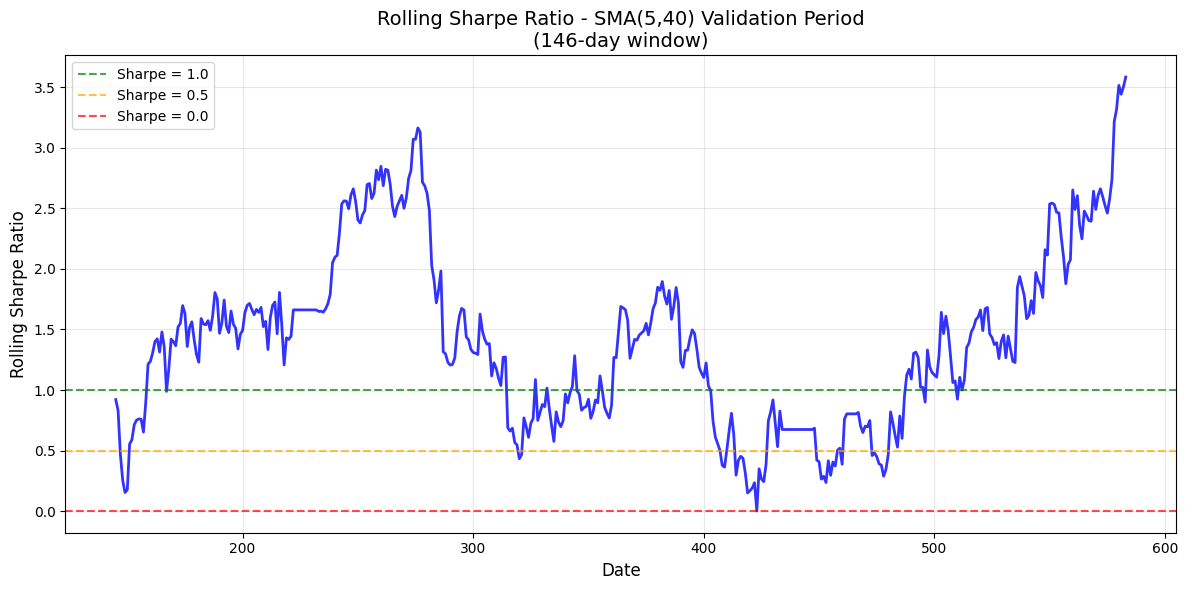

📊 Rolling Sharpe Statistics (146-day window):
  Current Sharpe:      3.583
  Average Sharpe:      1.403
  Best Sharpe:         3.583
  Worst Sharpe:        0.002
  Sharpe Volatility:   0.719


In [ ]:
# ROLLING SHARPE RATIO VISUALIZATION

import matplotlib.pyplot as plt
import pandas as pd

if 'pf_val' in locals():
    # Calculate rolling Sharpe (252-day window for daily data)
    returns_val = pf_val.returns()
    rolling_window = min(252, len(returns_val) // 4) # 1 year or 1/4 of data, whichever is smaller

    if len(returns_val) > rolling_window:
        rolling_sharpe = returns_val.rolling(window=rolling_window).apply(
        lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() = 0 else np.nan
        )

        plt.figure(figsize=(12, 6))
        plt.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2, color='blue', alpha=0.8)
        plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.7, label='Sharpe = 1.0')
        plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Sharpe = 0.5')
        plt.axhline(y=0.0, color='red', linestyle='--', alpha=0.7, label='Sharpe = 0.0')

        plt.title(f'Rolling Sharpe Ratio - SMA({ema1},{ema2}) Validation Period\n({rolling_window}-day window)', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Rolling Sharpe Ratio', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

        print(f" Rolling Sharpe Statistics ({rolling_window}-day window):")
        print(f" Current Sharpe: {rolling_sharpe.iloc[-1]:.3f}")
        print(f" Average Sharpe: {rolling_sharpe.mean():.3f}")
        print(f" Best Sharpe: {rolling_sharpe.max():.3f}")
        print(f" Worst Sharpe: {rolling_sharpe.min():.3f}")
        print(f" Sharpe Volatility: {rolling_sharpe.std():.3f}")
    else:
    print(" Not enough data for rolling Sharpe calculation")
else:
print(" No validation portfolio found. Run STEP 5 first.")


In [ ]:
# Step 5: Validate Best Triple EMA Strategy on Validation Set

print(" Validating Best Triple EMA Strategy on Unseen Validation Data")
print("=" * 60)

# Extract best parameters from training
best_ema1 = int(best_result['ema1_period'])
best_ema2 = int(best_result['ema2_period'])
best_ema3 = int(best_result['ema3_period'])

print(f"Testing best training strategy: EMA({best_ema1}, {best_ema2}, {best_ema3})")
print(f"Validation period: {val_close.index[0].date()} to {val_close.index[-1].date()}")

# Apply best strategy to validation data
val_ema1 = vbt.MA.run(val_close, best_ema1, ewm=True)
val_ema2 = vbt.MA.run(val_close, best_ema2, ewm=True)
val_ema3 = vbt.MA.run(val_close, best_ema3, ewm=True)

# Generate signals on validation data using triple EMA crossover logic
val_entries = (val_ema1.ma_crossed_above(val_ema2.ma) |
val_ema1.ma_crossed_above(val_ema3.ma) |
val_ema2.ma_crossed_above(val_ema3.ma))

val_exits = (val_ema1.ma_crossed_below(val_ema2.ma) |
val_ema1.ma_crossed_below(val_ema3.ma) |
val_ema2.ma_crossed_below(val_ema3.ma))

# Run validation backtest
val_portfolio = vbt.Portfolio.from_signals(
val_close,
val_entries,
val_exits,
init_cash=100_000,
fees=0.0005,
slippage=0.0005
)

# Calculate validation metrics
val_total_return = val_portfolio.total_return()
val_sharpe_ratio = val_portfolio.sharpe_ratio(freq="1D")
val_max_drawdown = val_portfolio.max_drawdown()
val_win_rate = val_portfolio.trades.win_rate()
val_total_trades = len(val_portfolio.trades)

print(" VALIDATION RESULTS")
print("-" * 30)
print(f"Strategy: EMA({best_ema1}, {best_ema2}, {best_ema3})")
print(f"Total Return: {val_total_return:.2%}")
print(f"Sharpe Ratio: {val_sharpe_ratio:.3f}")
print(f"Max Drawdown: {val_max_drawdown:.2%}")
print(f"Win Rate: {val_win_rate:.1%}")
print(f"Total Trades: {val_total_trades}")

print("\\n TRAINING vs VALIDATION COMPARISON")
print("-" * 40)
print(f"Total Return: Train: {best_result['total_return']:.2%} | Val: {val_total_return:.2%}")
print(f"Sharpe Ratio: Train: {best_result['sharpe_ratio']:.3f} | Val: {val_sharpe_ratio:.3f}")
print(f"Max Drawdown: Train: {best_result['max_drawdown']:.2%} | Val: {val_max_drawdown:.2%}")
print(f"Win Rate: Train: {best_result['win_rate']:.1%} | Val: {val_win_rate:.1%}")
print(f"Total Trades: Train: {best_result['total_trades']} | Val: {val_total_trades}")

print("\\n CONCLUSION: Triple EMA strategy validated on unseen data")
if val_sharpe_ratio > 0.5:
    print(" Strategy shows promising risk-adjusted returns")
elif val_sharpe_ratio > 0:
    print(" Strategy has positive but modest risk-adjusted returns")
else:
    print(" Strategy underperforms buy-and-hold on validation data")


🔍 Validating Best Triple EMA Strategy on Unseen Validation Data
Testing best training strategy: EMA(5, 40, 100)
Validation period: 2023-06-01 to 2025-09-29
📊 VALIDATION RESULTS
------------------------------
Strategy: EMA(5, 40, 100)
Total Return: 53.56%
Sharpe Ratio: 1.789
Max Drawdown: -8.66%
Win Rate: 50.0%
Total Trades: 8
\n🔄 TRAINING vs VALIDATION COMPARISON
----------------------------------------
Total Return:  Train: 120.90%  |  Val: 53.56%
Sharpe Ratio:   Train: 1.267  |  Val: 1.789
Max Drawdown:  Train: -15.72%  |  Val: -8.66%
Win Rate:      Train: 6000.0%  |  Val: 50.0%
Total Trades:  Train: 20.0  |  Val: 8
\n🎯 CONCLUSION: Triple EMA strategy validated on unseen data!
✅ Strategy shows promising risk-adjusted returns


In [ ]:
# STEP 5B: FULL-SAMPLE METRICS + SIGNALS VISUAL (uses best EMA from results)

import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

if results_df.empty:
    print("No results to analyze.")
else:
# Get best strategy by Sharpe ratio (highest)
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

# Build full-sample signals once from existing price series
ema1_full = vbt.MA.run(close, ema1, ewm=True).ma
ema2_full = vbt.MA.run(close, ema2, ewm=True).ma
ema3_full = vbt.MA.run(close, ema3, ewm=True).ma

# Triple EMA crossover signals
entries_1 = ema1_full.vbt.crossed_above(ema2_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
entries_2 = ema1_full.vbt.crossed_above(ema3_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
entries_3 = ema2_full.vbt.crossed_above(ema3_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
entries_full = entries_1 | entries_2 | entries_3

exits_1 = ema1_full.vbt.crossed_below(ema2_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
exits_2 = ema1_full.vbt.crossed_below(ema3_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
exits_3 = ema2_full.vbt.crossed_below(ema3_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
exits_full = exits_1 | exits_2 | exits_3

price_full = close.to_numpy(dtype=float)

# Full-sample portfolio
pf_full = vbt.Portfolio.from_signals(
close=price_full,
entries=entries_full,
exits=exits_full,
init_cash=100_000,
fees=0.0005,
slippage=0.0005,
freq=FREQ
)

# Train/Val split using same split_idx defined earlier
price_train = train_close.to_numpy(dtype=float)
price_val = val_close.to_numpy(dtype=float)

entries_train = entries_full[:split_idx]
exits_train = exits_full[:split_idx]
entries_val = entries_full[split_idx:]
exits_val = exits_full[split_idx:]

pf_train = vbt.Portfolio.from_signals(
close=price_train,
entries=entries_train,
exits=exits_train,
init_cash=100_000,
fees=0.0005,
slippage=0.0005,
freq=FREQ
)

pf_val2 = vbt.Portfolio.from_signals(
close=price_val,
entries=entries_val,
exits=exits_val,
init_cash=100_000,
fees=0.0005,
slippage=0.0005,
freq=FREQ
)

def trade_metrics(pf, idx: pd.Index):
    trades = pf.trades
    total_trades = len(trades)
    if len(idx) >= 2 and hasattr(idx[0], 'to_pydatetime'):
        years = (idx[-1] - idx[0]).days / 365.25
    else:
    # Fallback: assume daily bars
    years = len(idx) / 252.0
    years = years if years > 0 else 1e-9

    trades_per_year = total_trades / years
    win_rate_pct = np.nan
    profit_factor = np.nan
    expectancy = 0.0

    if total_trades > 0:
        tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
        if tr.size > 0:
            pos = tr[tr > 0]
            neg = tr[tr < 0]
            win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) > 0 else np.nan
            gains = pos.sum() if len(pos) else 0.0
            losses = abs(neg.sum()) if len(neg) else 0.0
            profit_factor = gains / losses if losses > 0 else np.inf
            expectancy = float(tr.mean())

            return total_trades, trades_per_year, win_rate_pct, profit_factor, expectancy

            def metrics_dict(pf, idx: pd.Index):
                total_trades, trades_per_year, win_rate_pct, profit_factor, expectancy = trade_metrics(pf, idx)
                return {
                'total_return': float(pf.total_return()),
                'annualized_return': float(pf.annualized_return(freq=FREQ)),
                'sharpe': float(pf.sharpe_ratio(freq=FREQ)),
                'sortino': float(pf.sortino_ratio(freq=FREQ)),
                'max_drawdown': float(pf.max_drawdown()),
                'volatility': float(pf.annualized_volatility(freq=FREQ)),
                'total_trades': total_trades,
                'trades_per_year': trades_per_year,
                'win_rate_pct': win_rate_pct,
                'profit_factor': profit_factor,
                'expectancy': expectancy,
                }

                m_train = metrics_dict(pf_train, train_close.index)
                m_val = metrics_dict(pf_val2, val_close.index)
                m_full = metrics_dict(pf_full, close.index)

                def chg(b, a):
                    if pd.isna(b) or pd.isna(a) or b == 0:
                        return "N/A"
                        return f"{((a - b) / abs(b)) * 100:+.1f}%"

                        # Print comparison table
                        print(f"EMA({ema1},{ema2},{ema3}) - Metrics")
                        print("=" * 80)
                        print(f"{'METRIC':<25} {'IN-SAMPLE':<15} {'OUT-OF-SAMPLE':<15} {'FULL-SAMPLE':<15} {'DEGRADATION':<15}")
                        print("-" * 80)

                        print("RETURN METRICS:")
                        print(f"{'Total Return':<25} {m_train['total_return']:<15.2%} {m_val['total_return']:<15.2%} {m_full['total_return']:<15.2%} {chg(m_train['total_return'], m_val['total_return'])}")
                        print(f"{'Annualized Return':<25} {m_train['annualized_return']:<15.2%} {m_val['annualized_return']:<15.2%} {m_full['annualized_return']:<15.2%} {chg(m_train['annualized_return'], m_val['annualized_return'])}")

                        print("\nRISK-ADJUSTED METRICS:")
                        print(f"{'Sharpe Ratio':<25} {m_train['sharpe']:<15.3f} {m_val['sharpe']:<15.3f} {m_full['sharpe']:<15.3f} {chg(m_train['sharpe'], m_val['sharpe'])}")
                        print(f"{'Sortino Ratio':<25} {m_train['sortino']:<15.3f} {m_val['sortino']:<15.3f} {m_full['sortino']:<15.3f} {chg(m_train['sortino'], m_val['sortino'])}")

                        print("\nRISK METRICS:")
                        print(f"{'Max Drawdown':<25} {m_train['max_drawdown']:<15.2%} {m_val['max_drawdown']:<15.2%} {m_full['max_drawdown']:<15.2%} {chg(m_train['max_drawdown'], m_val['max_drawdown'])}")
                        print(f"{'Volatility':<25} {m_train['volatility']:<15.2%} {m_val['volatility']:<15.2%} {m_full['volatility']:<15.2%} {chg(m_train['volatility'], m_val['volatility'])}")

                        print


EMA(5,40,100) - Metrics
METRIC                    IN-SAMPLE       OUT-OF-SAMPLE   FULL-SAMPLE     DEGRADATION    
--------------------------------------------------------------------------------
RETURN METRICS:
Total Return              120.90%         55.05%          260.77%         -54.5%
Annualized Return         23.66%          31.53%          27.21%          +33.3%

RISK-ADJUSTED METRICS:
Sharpe Ratio              1.267           1.827           1.453           +44.2%
Sortino Ratio             1.807           2.703           2.091           +49.6%

RISK METRICS:
Max Drawdown              -15.72%         -8.66%          -15.72%         +44.9%
Volatility                18.06%          15.68%          17.65%          -13.2%


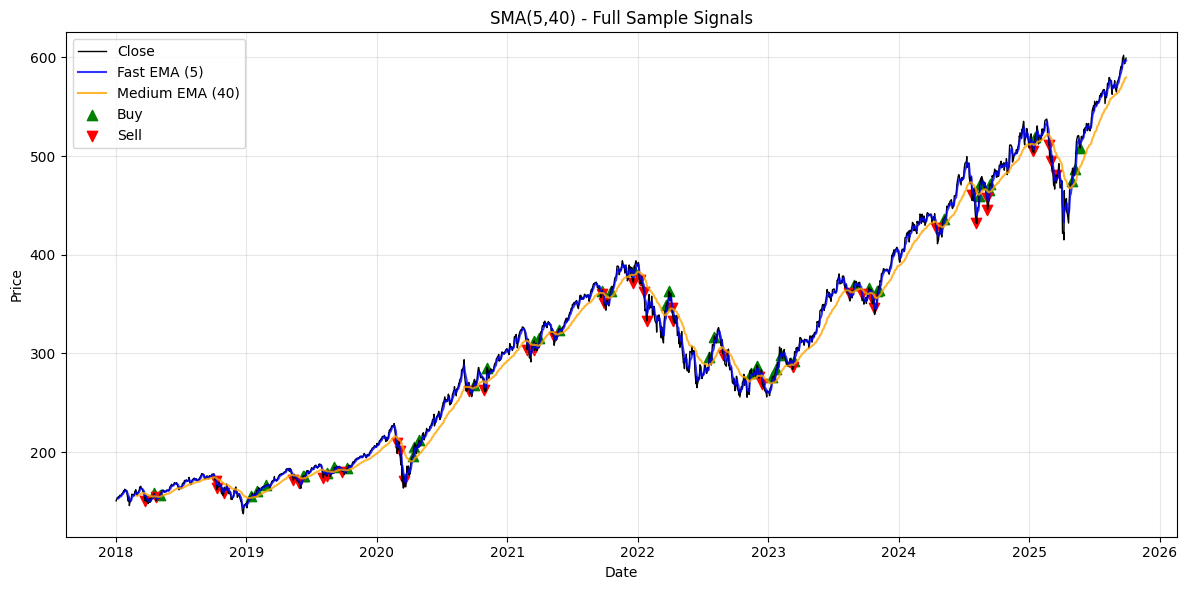

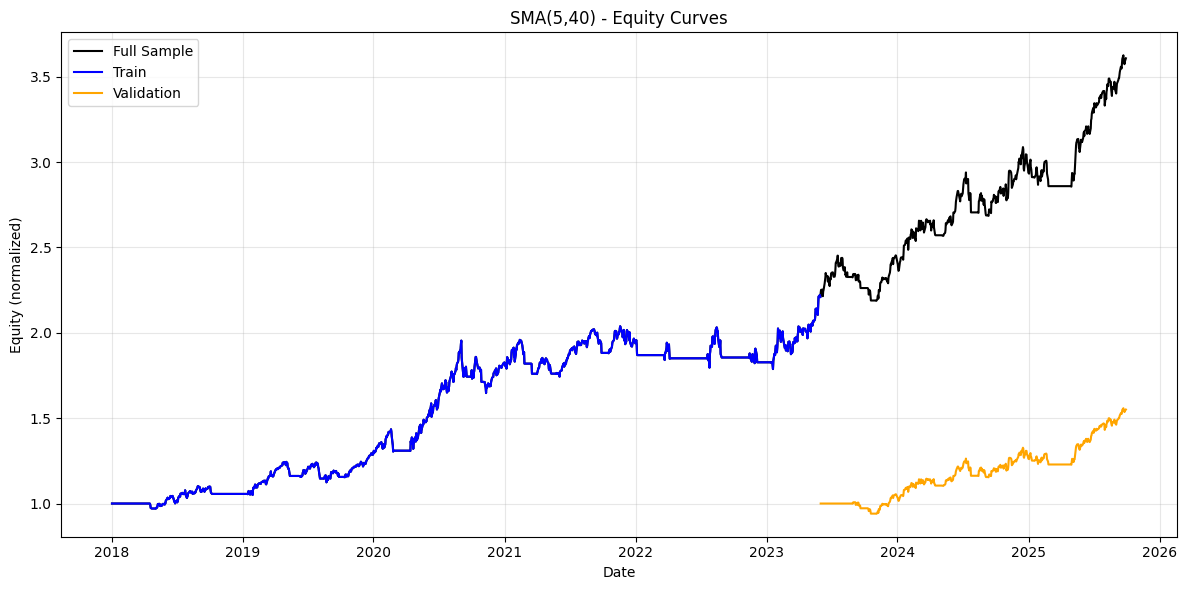

In [ ]:
# STEP 5C: VISUALS ONLY (Signals + Equity Curves)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vectorbt as vbt

if results_df.empty:
    print("No results to visualize.")
else:
# Get best strategy by Sharpe ratio (highest)
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

# Use objects from previous cell if available; otherwise derive minimally
need_build = False
for name in ['ema1_full', 'ema2_full', 'entries_full', 'exits_full']:
    if name not in locals():
        need_build = True
        break

        if need_build:
            ema1_full = vbt.MA.run(close, ema1, ewm=True).ma
            ema2_full = vbt.MA.run(close, ema2, ewm=True).ma
            entries_full = ema1_full.vbt.crossed_above(ema2_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
            exits_full = ema1_full.vbt.crossed_below(ema2_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)

            # 1) Price + MAs + signals (full sample)
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(close.index, close.values, label='Close', color='black', linewidth=1)
            ax.plot(close.index, ema1_full.values, label=f'Fast EMA ({ema1})', color='blue', alpha=0.8)
            ax.plot(close.index, ema2_full.values, label=f'Medium EMA ({ema2})', color='orange', alpha=0.8)

            buy_idx = close.index[entries_full]
            sell_idx = close.index[exits_full]
            ax.scatter(buy_idx, close.reindex(buy_idx).values, marker='^', color='green', s=55, label='Buy')
            ax.scatter(sell_idx, close.reindex(sell_idx).values, marker='v', color='red', s=55, label='Sell')

            ax.set_title(f'SMA({ema1},{ema2}) - Full Sample Signals')
            ax.set_xlabel('Date')
            ax.set_ylabel('Price')
            ax.grid(True, alpha=0.3)
            ax.legend()
            plt.tight_layout()
            plt.show()

            # 2) Equity curves: train / val / full
            price_full = close.to_numpy(dtype=float)
            entries_train = entries_full[:split_idx]
            exits_train = exits_full[:split_idx]
            entries_val = entries_full[split_idx:]
            exits_val = exits_full[split_idx:]

            pf_full = vbt.Portfolio.from_signals(
            close=price_full,
            entries=entries_full,
            exits=exits_full,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq=FREQ
            )

            pf_train = vbt.Portfolio.from_signals(
            close=train_close.to_numpy(dtype=float),
            entries=entries_train,
            exits=exits_train,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq=FREQ
            )

            pf_val2 = vbt.Portfolio.from_signals(
            close=val_close.to_numpy(dtype=float),
            entries=entries_val,
            exits=exits_val,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq=FREQ
            )

            eq_full = (1 + pf_full.returns()).cumprod()
            eq_train = (1 + pf_train.returns()).cumprod()
            eq_val = (1 + pf_val2.returns()).cumprod()

            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(close.index, eq_full.values, label='Full Sample', color='black')
            ax.plot(train_close.index, eq_train.values, label='Train', color='blue')
            ax.plot(val_close.index, eq_val.values, label='Validation', color='orange')

            ax.set_title(f'SMA({ema1},{ema2}) - Equity Curves')
            ax.set_xlabel('Date')
            ax.set_ylabel('Equity (normalized)')
            ax.grid(True, alpha=0.3)
            ax.legend()
            plt.tight_layout()
            plt.show()



In [ ]:
# 1. equity curve scheiden van, en per trade plotten zodat het meer op TV lijkt.

# 2. de signals van de buy en sell duidelijker maken, dit is een beetje een bende vind ik


In [ ]:
# STEP 5E: PARAMETER SENSITIVITY TABLE (±15 lookbacks around current ema1, ema2)

import numpy as np
import pandas as pd
import vectorbt as vbt

if results_df.empty:
    print("No results available for sensitivity analysis.")
else:
# Get best strategy by Sharpe ratio (highest)
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

fast_candidates = list(range(max(2, ema1 - 15), ema1 + 16))
slow_candidates = list(range(max(3, ema2 - 15), ema2 + 16))
combos = [(f, ema2, ema3) for f in fast_candidates] + [(ema1, s, ema3) for s in slow_candidates if s = ema2]

price_np = train_close.to_numpy(dtype=float)
idx = train_close.index

def series_to_np_bool(s: pd.Series) -> np.ndarray:
    return s.reindex(idx).fillna(False).astype(bool).to_numpy(dtype=bool)

    def eval_combo(ema1: int, ema2: int, ema3: int) -> dict:
        fma = vbt.MA.run(train_close, ema1, ewm=True).ma
        sma = vbt.MA.run(train_close, ema2, ewm=True).ma
        e = series_to_np_bool(fma.vbt.crossed_above(sma))
        x = series_to_np_bool(fma.vbt.crossed_below(sma))

        pf = vbt.Portfolio.from_signals(
        close=price_np, entries=e, exits=x,
        init_cash=100_000, fees=0.0005, slippage=0.0005, freq=FREQ
        )

        total_return = float(pf.total_return())
        sharpe = float(pf.sharpe_ratio(freq=FREQ))
        sortino = float(pf.sortino_ratio(freq=FREQ))
        mdd = float(pf.max_drawdown())
        vol = float(pf.annualized_volatility(freq=FREQ))

        trades = pf.trades
        ntr = len(trades)
        win_rate_pct = np.nan
        profit_factor = np.nan
        expectancy = 0.0
        if ntr > 0:
            tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
            if tr.size > 0:
                pos = tr[tr > 0]
                neg = tr[tr < 0]
                win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) else np.nan
                gains = pos.sum() if len(pos) else 0.0
                losses = abs(neg.sum()) if len(neg) else 0.0
                profit_factor = gains / losses if losses > 0 else np.inf
                expectancy = float(tr.mean())

                return {
                'ema1': ema1, 'ema2': ema2, 'ema3': ema3,
                'sharpe': sharpe, 'sortino': sortino,
                'total_return': total_return, 'max_drawdown': mdd, 'volatility': vol,
                'total_trades': ntr, 'win_rate_pct': win_rate_pct,
                'profit_factor': profit_factor, 'expectancy': expectancy
                }

                rows = []
                for combo in combos:
                    try:
                    if len(combo) == 3:
                        rows.append(eval_combo(*combo))
                    else:
                    rows.append(eval_combo(combo[0], ema2, ema3))
                except Exception:
                    pass

                    if not rows:
                        print("No sensitivity results computed.")
                    else:
                    sens = pd.DataFrame(rows)

                    # Show as a table (sorted by fast, slow). Use display() in notebooks for nice HTML table.
                    cols = ['ema1','ema2','ema3','sharpe','sortino','total_return','max_drawdown','volatility',
                    'total_trades','win_rate_pct','profit_factor','expectancy']
                    sens_table = sens[cols].sort_values(['ema1','ema2'])
                    display(sens_table)

                    # Compact variation summary (to see how much metrics change)
                    metric_cols = ['sharpe','sortino','total_return','max_drawdown','volatility',
                    'win_rate_pct','profit_factor','expectancy']
                    summary = sens_table[metric_cols].agg(['mean','std','min','max']).T
                    print("\nSensitivity summary (mean / std / min / max):")
                    print(summary.round(4).to_string())


,ema1,ema2,ema3,sharpe,sortino,total_return,max_drawdown,volatility,total_trades,win_rate_pct,profit_factor,expectancy
0,2,40,100,0.899892,1.250839,0.743318,-0.226622,0.184520,35,37.142857,2.224746,0.018701
1,3,40,100,1.145670,1.619535,1.045576,-0.167376,0.181923,25,48.000000,3.323765,0.032438
2,4,40,100,1.168209,1.656832,1.069776,-0.164140,0.180960,20,55.000000,4.267880,0.040903
19,5,25,100,0.942646,1.325509,0.780690,-0.292720,0.181596,28,46.428571,2.347071,0.024324
20,5,26,100,1.023624,1.447024,0.875263,-0.260452,0.180606,28,46.428571,2.581117,0.026125
21,5,27,100,0.948375,1.330299,0.788022,-0.200148,0.181680,27,48.148148,2.520114,0.025027
22,5,28,100,1.023196,1.440107,0.879220,-0.171416,0.181375,26,50.000000,2.836600,0.027864
23,5,29,100,1.036501,1.460236,0.896299,-0.173597,0.181389,24,54.166667,3.030201,0.030443
24,5,30,100,0.946346,1.325552,0.790002,-0.173597,0.182554,25,48.000000,2.734182,0.026901
25,5,31,100,0.970237,1.360470,0.820085,-0.173597,0.182689,25,48.000000,2.778834,0.027593



Sensitivity summary (mean / std / min / max):
                  mean     std      min      max
sharpe          0.9662  0.1100   0.7781   1.1682
sortino         1.3524  0.1670   1.0794   1.6580
total_return    0.8232  0.1263   0.6296   1.0698
max_drawdown   -0.1991  0.0272  -0.2927  -0.1641
volatility      0.1838  0.0032   0.1793   0.1925
win_rate_pct   50.2357  6.6713  37.1429  60.0000
profit_factor   3.3171  0.6516   2.2247   5.3923
expectancy      0.0355  0.0077   0.0187   0.0542


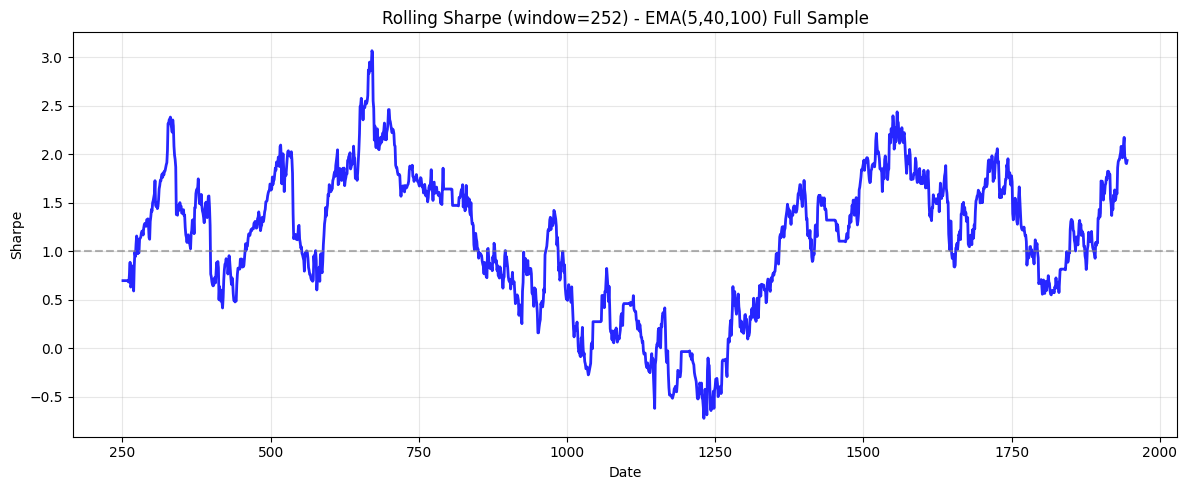

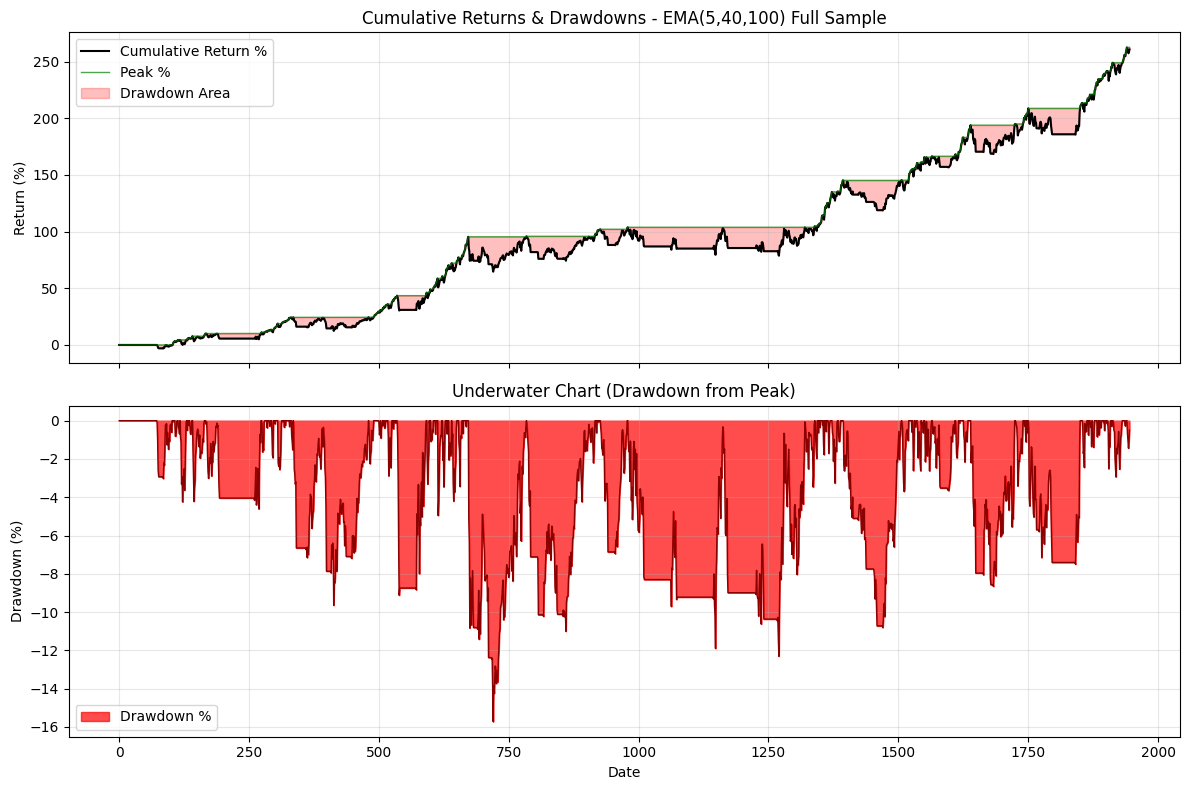

In [ ]:
# STEP 5D: FULL-SAMPLE ROLLING SHARPE + DRAWDOWNS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vectorbt as vbt

if results_df.empty:
    print("No results to visualize.")
else:
# Get best strategy by Sharpe ratio (highest)
best = results_df.loc[results_df['sharpe_ratio'].idxmax()]
ema1, ema2, ema3 = int(best['ema1_period']), int(best['ema2_period']), int(best['ema3_period'])

# Ensure full-sample signals/portfolio are available with minimal work
need_build = False
for name in ['ema1_full', 'ema2_full', 'ema3_full', 'entries_full', 'exits_full']:
    if name not in locals():
        need_build = True
        break

        if need_build:
            ema1_full = vbt.MA.run(close, ema1, ewm=True).ma
            ema2_full = vbt.MA.run(close, ema2, ewm=True).ma
            ema3_full = vbt.MA.run(close, ema3, ewm=True).ma
            # Triple EMA crossover signals
            entries_1 = ema1_full.vbt.crossed_above(ema2_full).reindex(close.index).fillna(False)
            entries_2 = ema1_full.vbt.crossed_above(ema3_full).reindex(close.index).fillna(False)
            entries_3 = ema2_full.vbt.crossed_above(ema3_full).reindex(close.index).fillna(False)
            entries_full = (entries_1 | entries_2 | entries_3).to_numpy(dtype=bool)
            exits_1 = ema1_full.vbt.crossed_below(ema2_full).reindex(close.index).fillna(False)
            exits_2 = ema1_full.vbt.crossed_below(ema3_full).reindex(close.index).fillna(False)
            exits_3 = ema2_full.vbt.crossed_below(ema3_full).reindex(close.index).fillna(False)
            exits_full = (exits_1 | exits_2 | exits_3).to_numpy(dtype=bool)

            price_full = close.to_numpy(dtype=float)

            if 'pf_full' not in locals():
                pf_full = vbt.Portfolio.from_signals(
                close=price_full,
                entries=entries_full,
                exits=exits_full,
                init_cash=100_000,
                fees=0.0005,
                slippage=0.0005,
                freq=FREQ
                )

                # Compute returns
                ret = pf_full.returns()

                # 1) Rolling Sharpe (default daily data, 252-day window bounded by series length)
                rolling_window = max(20, min(252, max(1, len(ret) // 4)))
                if len(ret) > rolling_window:
                    rolling_sharpe = ret.rolling(window=rolling_window).apply(
                    lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() and x.std() = 0 else np.nan,
                    raw=False
                    )

                    plt.figure(figsize=(12, 5))
                    plt.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2, color='blue', alpha=0.85)
                    plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.6)
                    plt.title(f'Rolling Sharpe (window={rolling_window}) - EMA({ema1},{ema2},{ema3}) Full Sample')
                    plt.xlabel('Date')
                    plt.ylabel('Sharpe')
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                else:
                print("Not enough data for rolling Sharpe calculation.")

                # 2) Drawdowns (underwater)
                eq = (1 + ret).cumprod()
                peak = eq.cummax()
                dd = (eq - peak) / peak

                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

                ax1.plot(eq.index, (eq - 1) * 100, color='black', linewidth=1.5, label='Cumulative Return %')
                ax1.plot(peak.index, (peak - 1) * 100, color='green', linewidth=1.0, alpha=0.7, label='Peak %')
                ax1.fill_between(eq.index, (eq - 1) * 100, (peak - 1) * 100, color='red', alpha=0.25, label='Drawdown Area')
                ax1.set_title(f'Cumulative Returns & Drawdowns - EMA({ema1},{ema2},{ema3}) Full Sample')
                ax1.set_ylabel('Return (%)')
                ax1.grid(True, alpha=0.3)
                ax1.legend()

                ax2.fill_between(dd.index, dd * 100, 0, color='red', alpha=0.7, label='Drawdown %')
                ax2.plot(dd.index, dd * 100, color='darkred', linewidth=1)
                ax2.set_title('Underwater Chart (Drawdown from Peak)')
                ax2.set_xlabel('Date')
                ax2.set_ylabel('Drawdown (%)')
                ax2.grid(True, alpha=0.3)
                ax2.legend()

                plt.tight_layout()
                plt.show()

